<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

교차 검증을 사용한 그리드 서치를 매개변수 조정 방법으로 널리 사용하므로, scikit-learn은 GridSearchCV를 제공하고 있음
검색 대상이 되는 매개변수를 딕셔너리 자료형으로 구성해야 함

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()

# 1. parameter grid 생성
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100] }


In [13]:

# 2. GridSearchCV 이용하여 객체 생성
grid_search = GridSearchCV(SVC(), param_grid, cv =5, return_train_score=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0 ,test_size=0.2)

In [15]:

# 4. gridsearch model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [16]:
# 4. gridsearch model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [17]:
# 5. model evaluation
print("test set score : {}".format(grid_search.score(X_test, y_test)))

test set score : 1.0


In [18]:
# 6. best parameter and best score
print("best parameters : {}".format(grid_search.best_params_))
print("best score : {}".format(grid_search.best_score_))

best parameters : {'C': 1, 'gamma': 0.1}
best score : 0.9583333333333334


- 여기서 5. 과 6. 의 결과를 구분하는 것이 필요

- 5. : 교차 검증과 그리드 서치의 결과로 산정한 최적 매개변수를 적용하여 전체 훈련 데이터 셋에 대해 훈련한 최종 모델에 테스트 데이터로 적용했을 때의 결과

- 6. : best_score_ 속성은 훈련 세트에서 수행한 교차검증의 평균 정확도가 저장된 결과

* GridSearchCV.fit 메서드는 최적의 매개변수를 찾는 일뿐만 아니라, 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동으로 만든다.

[교차 검증 결과 분석]

결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 주는 정도를 이해하는데 도움을 준다
grid search는 연산 비용이 높으므로, 비교적 간격을 넓게 하여 적은 수의 그리드로 시작하는 것이 좋다.
이후 결과를 분석하여 검색을 확장해 나갈 수 있다
그리드 서치의 결과는 cv_results_ 속성에 있다

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
# 1. cv_results_ dictionary -> dataFrame
results = pd.DataFrame(grid_search.cv_results_)


In [22]:
# 2. first 5 rows
results.head(3)
# 여기서 grid_search.cv_results_ 의 값들을 확인 할 수 있다.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001452,0.000354,0.000592,0.000099,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.375,0.375,0.375,0.333333,0.366667,0.016667,22,0.364583,0.364583,0.364583,0.364583,0.375,0.366667,0.004167
1,0.000892,0.000019,0.000363,0.000013,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.375,0.375,0.375,0.333333,0.366667,0.016667,22,0.364583,0.364583,0.364583,0.364583,0.375,0.366667,0.004167
2,0.000878,0.000026,0.000345,0.000005,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.375,0.375,0.375,0.333333,0.366667,0.016667,22,0.364583,0.364583,0.364583,0.364583,0.375,0.366667,0.004167


Text(0.5, 0, 'gamma')

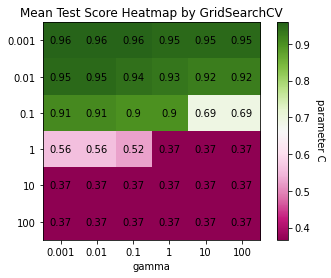

In [23]:
# 3. heatmap
scores = np.array(results.mean_test_score.sort_values(ascending=False)).reshape(6,6)
fig, ax = plt.subplots()
im = ax.imshow(scores, cmap='PiYG')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(ylabel="parameter C ", rotation=-90, va = "bottom")
ax.set_xticks(np.arange(len(set(results.param_gamma))))
ax.set_yticks(np.arange(len(set(results.param_C))))

ax.set_xticklabels(param_grid['gamma'])
ax.set_yticklabels(param_grid['C'])

for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        text = ax.text(j,i,np.round(scores[i,j],2),ha='center', va='center',color='k')
        
ax.set_title("Mean Test Score Heatmap by GridSearchCV")
ax.set_xlabel("gamma")